In [18]:
import numpy as np
from sklearn import datasets
import datetime,math
from sklearn import linear_model
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [22]:
# 需要设置的参数
xk = np.array([10])    # 初始点
eta = 0.1     # 学习率
epochs = 5000     # 迭代上限
epsilon = 0.0000001 # 梯度模长的上限

# 抛物线函数
def f(x):
    return x[0]*x[0]

# 抛物线函数的梯度
def df(x):
    return 2*x

# 梯度下降法
for i in range(epochs):
    dfxk = df(xk)
    if np.linalg.norm(dfxk) < epsilon:
        print('经过 {} 次迭代，梯度下降法运行完毕'.format(i+1))
        print('结果为 xk = {} ，f(xk) = {}'.format(xk, f(xk)))
        break
    xk = xk-eta*dfxk

经过 87 次迭代，梯度下降法运行完毕
结果为 xk = [4.63168357e-08] ，f(xk) = 2.145249268790818e-15


In [21]:
# 需要设置的参数
wk = np.array([0, 0, 0]) # 初始点
eta = 0.1    # 学习率
epochs = 10000000 # 迭代上限
epsilon = 0.0005 # 梯度模长的上限

# 鸢尾花数据集
sampleNumber = 100
iris = datasets.load_iris()
X = np.insert(iris.data[50:50+sampleNumber, [2,3]], 0, 1, axis=1) # 取其中两种鸢尾花的最后两个特征，并给每行的第一列增加 1
y = np.where(iris.target[50:50+sampleNumber] == 1, -1, 1) # 两种类别分别用标签 -1 和 1 来表示

# sigmoid 函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 逻辑回归的假设函数
def h(x):
    return sigmoid(x@wk.T)

# 经验误差函数
def rhd(w):
    return np.mean(np.log(1+np.exp(-y*(X@w))))

# 经验误差函数的梯度
def drhd(w):
    ew0 = np.mean(-y*X[:, 0]*np.exp(-y*(X@w))/(1+np.exp(-y*(X@w))))
    ew1 = np.mean(-y*X[:, 1]*np.exp(-y*(X@w))/(1+np.exp(-y*(X@w))))
    ew2 = np.mean(-y*X[:, 2]*np.exp(-y*(X@w))/(1+np.exp(-y*(X@w))))
    return np.array([ew0, ew1, ew2])

# 梯度下降法
starttime = datetime.datetime.now()
for i in range(epochs):
    drhdwk = drhd(wk)
    if np.linalg.norm(drhdwk) < epsilon:
        endtime = datetime.datetime.now()
        print('迭代 {} 次后停止，||∇Rhd|| = {}，耗时约 {} 。'.format(i, np.linalg.norm(drhdwk), endtime-starttime))
        break
    wk = wk-eta*drhdwk

迭代 156192 次后停止，||∇Rhd|| = 0.0004999985803737898，耗时约 0:00:10.883893 。


In [11]:
# 需要设置的参数
wk = np.array([0, 0, 0])		# 初始点
eta = 0.1					    # 学习率
epochs = 156192 				# 迭代上限

# 鸢尾花数据集
sampleNumber = 100
iris = datasets.load_iris()
X = np.insert(iris.data[50:50+sampleNumber, [2,3]], 0, 1, axis=1)	# 取其中两种鸢尾花的最后两个特征，并给每行的第一列增加 1
y = np.where(iris.target[50:50+sampleNumber] == 1, -1, 1)			# 两种类别分别用标签 -1 和 1 来表示

# sigmoid 函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 逻辑回归的假设函数
def h(x):
	return sigmoid(x@wk.T)

# 经验误差函数
def rhd(w):
	return np.mean(np.log(1+np.exp(-y*(X@w))))

# 经验误差函数的梯度
def drhd(w):
	ew0 = np.mean(-y*X[:, 0]*np.exp(-y*(X@w))/(1+np.exp(-y*(X@w))))
	ew1 = np.mean(-y*X[:, 1]*np.exp(-y*(X@w))/(1+np.exp(-y*(X@w))))
	ew2 = np.mean(-y*X[:, 2]*np.exp(-y*(X@w))/(1+np.exp(-y*(X@w))))
	return np.array([ew0, ew1, ew2])

# 经验误差函数的随机梯度
def srhd(w):
	# 从 X 和 y 中随机挑出一个点
	ran = np.random.randint(sampleNumber)
	xi, yi = X[ran], y[ran]
	# 对这个点求经验误差函数的梯度，没有直接用 drhd 函数是因为用矩阵速度太慢
	return -yi*xi*math.exp(-yi*np.dot(w, xi))/(1+math.exp(-yi*np.dot(w, xi)))

# 随机梯度下降法
starttime = datetime.datetime.now()
for _ in range(epochs):
	srhdwk = srhd(wk)
	wk = wk-eta*srhdwk

endtime = datetime.datetime.now()
print('迭代 {} 次后停止，||∇Rhd|| = {}，耗时约 {} 。'.format(epochs, np.linalg.norm(drhd(wk)), endtime-starttime))

迭代 156192 次后停止，||∇Rhd|| = 0.25730231305305273，耗时约 0:00:03.636308 。


In [ ]:
# the result is different. but saved time. 

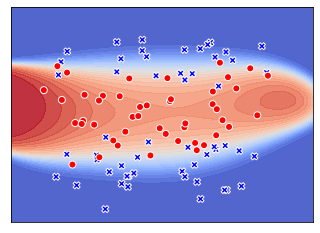

In [12]:
# this example comes from skitlearn
np.random.seed(666)

xy_min, xy_max = -2, 2

# 生成数据集
X, y = np.array([]).reshape(-1,2), np.array([])
for _ in range(100):
	x1, x2 = np.random.uniform(xy_min,xy_max), np.random.uniform(xy_min,xy_max)
	X = np.append(X, [[np.random.normal(x1, 0.4), np.random.normal(x2, 0.4)]], axis=0)
	y = np.append(y, [-1 if (x2 < -1 or x2 > 1) else 1])

# 构造 8 次多项式的逻辑回归，并进行学习，罚项就是在这里增加的
clf = Pipeline([
        ('poly', PolynomialFeatures(degree=8)),	# 8 次多项式的特征转换
        ('std_scale', StandardScaler()),
        ('log_reg', linear_model.LogisticRegression(C=0.2)) # 逻辑回归，C 越小代表罚项带来的惩罚越大
    ]).fit(X,y)

# 以下是绘制代码
# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 创建并排的两个subfigure
fig, ax = plt.subplots(figsize = (6, 3))
fig.subplots_adjust(left=0.15, right=0.85, top=0.999, bottom=0.001)
ax.set(xticks=[], yticks=[])
ax.set_xlim(xy_min-1, xy_max+1),ax.set_ylim(xy_min-1, xy_max+1)

# 绘制决策区域
resolution = 0.05
xx1, xx2 = np.mgrid[xy_min-1:xy_max+1.1:resolution, xy_min-1:xy_max+1.1:resolution]
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx1.shape)
contour = ax.contourf(xx1, xx2, probs, 25, cmap="coolwarm", vmin=0, vmax=1, alpha=0.9)

# 绘制数据集
markers = ('X', 'o')
vmin, vmax = min(y), max(y)
cm = ListedColormap(('blue', 'red'))
for cl, m in zip(np.unique(y), markers):
	ax.scatter(x=X[y==cl, 0], y=X[y==cl, 1], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='w', marker = m, s=7**2)

plt.show()

$$ \hat{\boldsymbol{w}}=\operatorname*{argmin}_{\boldsymbol{w}}\hat{R}_D(h)+\frac{1}{|D|}\lambda\sum_{i=1}^{n}||\boldsymbol{w}|| ^2 $$

$$ \hat{R}_D(h)+\frac{1}{|D|}\lambda\sum_{i=1}^{n}||\boldsymbol{w}|| ^2=\frac{1}{|D|}\sum_{i}\ln\left(1+e^{-y_i\boldsymbol{w}^\mathrm{T}\boldsymbol{x_i}}\right)+\frac{1}{|D|}\lambda\sum_{i=1}^{n}||\boldsymbol{w}|| ^2 $$